In [2]:
import numpy as np
import pandas as pd 

#testing_letter = pd.read_csv('./emnist_encoded_test.csv')
#training_letter = pd.read_csv('./emnist_encoded_train.csv')


Arbi found the dataset, analysed it.
I performed one-hot encoding, normalisation of the data.
Algorithm is jointly developed and is yet to be improved. (in terms of accuracy)

In [3]:
y1 = pd.read_csv('dataset/y_train_encoded.csv').values ## The first 26 columns correspond one-hot-encoded to labels
x1 = pd.read_csv('dataset/X_train.csv').values ## All the other columns correspond to pixel values for each 28x28 image , to know the amount of images  
#testing_letters                          ## in front of each label, we have 784 values in a row, which correspond to pixels in a single image of that label
y2 = pd.read_csv('dataset/y_test_encoded.csv').values ## LABELS 
x2 =  pd.read_csv('dataset/X_test.csv').values

print(y1.shape)
print(x1.shape)

(71039, 26)
(71039, 784)


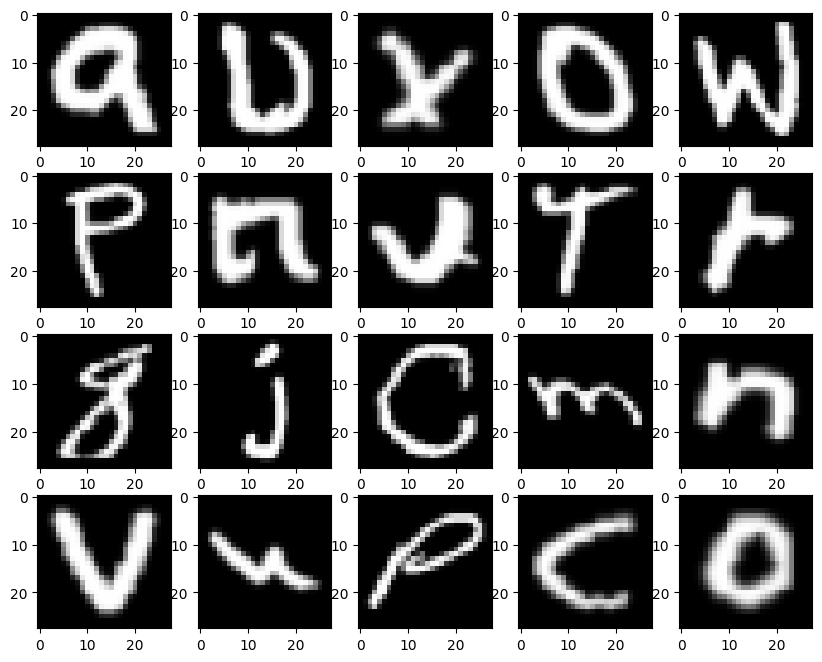

In [4]:
import matplotlib.pyplot as plt 
from scipy.ndimage import rotate

fig,axes = plt.subplots(4,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ### We think images should be rotated 
    ax.imshow(rotate(np.fliplr(np.array(x2[i]).reshape(28, 28)), 90), cmap='gray')

Normalisation of data and reshaping 

In [5]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)
print(train_images.shape)


test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)
print(test_images.shape)

(71039, 28, 28, 1)
(17760, 28, 28, 1)


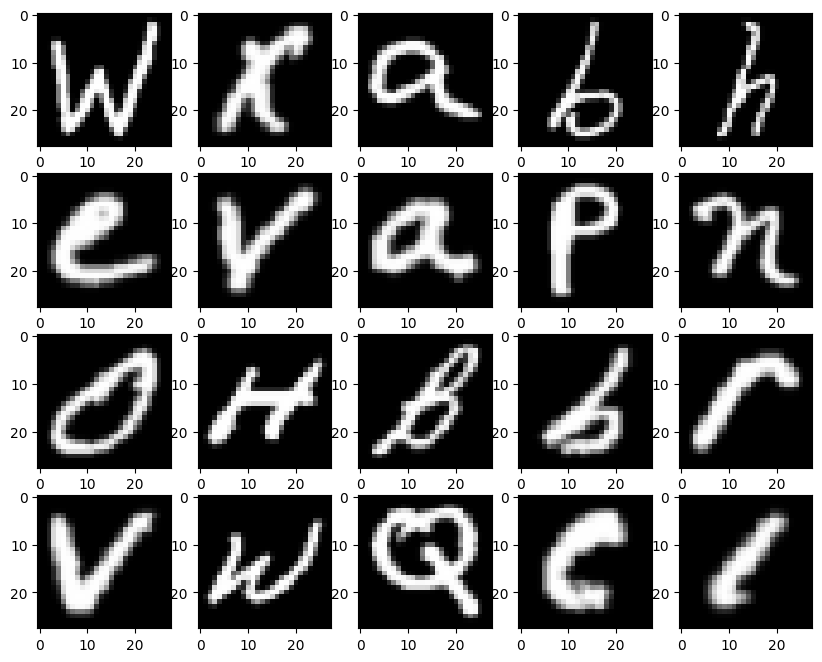

In [6]:
fig,axes = plt.subplots(4,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
                                ### reshaping a (1,784) vector into 28x28 matrix
    ax.imshow(rotate(np.fliplr(np.array(train_images[i]).reshape(28, 28)), 90), cmap='gray')

In [7]:
train_labels = y1
test_labels = y2

train_labels.shape

(71039, 26)

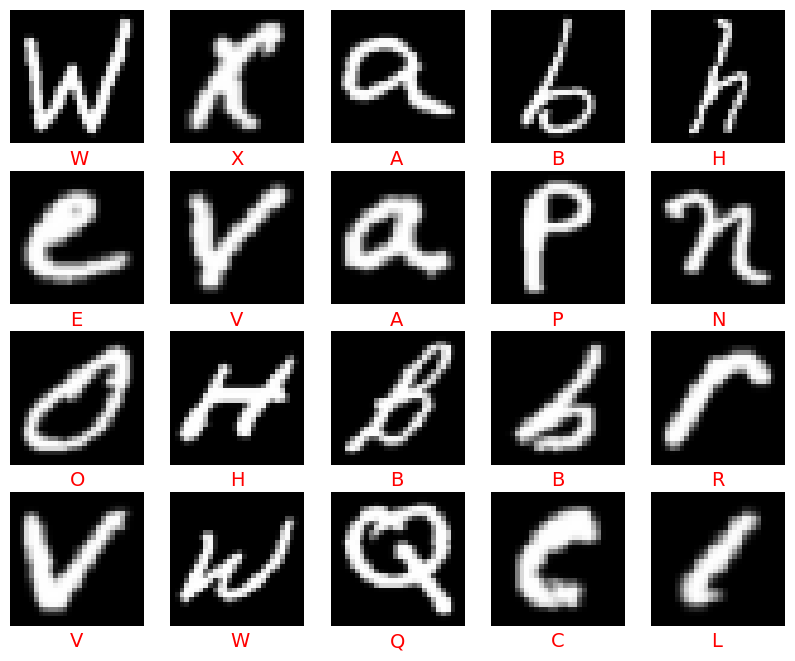

In [8]:
# Here's a sample dictionary mapping index to letters
label_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

fig, axes = plt.subplots(4, 5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    # Reshaping a (1, 784) vector into 28x28 matrix
    #img = np.array(train_images[i]).reshape(28,28)
    img = rotate(np.fliplr(np.array(train_images[i]).reshape(28, 28)), 90)
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    
    # Finding the index of the maximum value in the one-hot-encoded label
    label_index = np.argmax(train_labels[i])
    
    # Getting the corresponding letter from the dictionary
    letter = label_dict[label_index]
    
    # Printing the letter under the image
    ax.text(12, img.shape[0] + 4, letter, color='red', fontsize=14, ha='left')
    
plt.show()

In [9]:
from tqdm import tqdm
label_count = 26
pixels = 28 * 28

input_size = pixels
hidden1_size = 256
hidden2_size = 128
hidden3_size = 64  

output_size = 26

# WEIGHTS FOR EACH LAYER
w_i_h1 = np.random.uniform(-0.5, 0.5, (hidden1_size, input_size))
w_h1_h2 = np.random.uniform(-0.5, 0.5, (hidden2_size, hidden1_size))
w_h2_h3 = np.random.uniform(-0.5, 0.5, (hidden3_size, hidden2_size))  
w_h3_o = np.random.uniform(-0.5, 0.5, (output_size, hidden3_size))    

# BIASES OF EACH LAYER
b_i_h1 = np.zeros((hidden1_size, 1))
b_h1_h2 = np.zeros((hidden2_size, 1))
b_h2_h3 = np.zeros((hidden3_size, 1))  
b_h3_o = np.zeros((output_size, 1))

print(w_i_h1.shape)

learn_rate = 0.01
nr_correct = 0
epochs = 20
scores = []

cur_step = 0
for epoch in range(epochs):
    for img, l in tqdm(zip(train_images, train_labels)):
        img = img.reshape(-1, 1)  # Reshape img to a column vector
        l = l.reshape(-1, 1)      # reshape labels to a column vector

        # Forward propagation
        h1_pre = b_i_h1 + w_i_h1.dot(img)
        h1 = np.log(1 + np.exp(h1_pre))  # Softplus activation
        
        h2_pre = b_h1_h2 + w_h1_h2.dot(h1)
        h2 = np.log(1 + np.exp(h2_pre))  # Softplus activation
        
        h3_pre = b_h2_h3 + w_h2_h3.dot(h2)  
        h3 = np.log(1 + np.exp(h3_pre))  # Softplus activation

        o_pre = b_h3_o + w_h3_o.dot(h3)
        o = 1 / (1 + np.exp(-o_pre))

        # Cost / Error calculation
        e = 1 / len(o) * np.sum((o - l) ** 2, axis=0)
        nr_correct += int(np.argmax(o) == np.argmax(l))

        # Backpropagation
        partial_o = o - l
        delta_h3 = np.transpose(w_h3_o).dot(partial_o) * (1 / (1 + np.exp(-h3_pre)))  # Derivative of Softplus
        
        delta_h2 = np.transpose(w_h2_h3).dot(delta_h3) * (1 / (1 + np.exp(-h2_pre)))  # Derivative of Softplus
        delta_h1 = np.transpose(w_h1_h2).dot(delta_h2) * (1 / (1 + np.exp(-h1_pre)))  # Derivative of Softplus
        
        w_h3_o += -learn_rate * partial_o.dot(np.transpose(h3))
        b_h3_o += -learn_rate * partial_o
        
        w_h2_h3 += -learn_rate * delta_h3.dot(np.transpose(h2))
        b_h2_h3 += -learn_rate * delta_h3
        
        w_h1_h2 += -learn_rate * delta_h2.dot(np.transpose(h1))
        b_h1_h2 += -learn_rate * delta_h2
        
        w_i_h1 += -learn_rate * delta_h1.dot(np.transpose(img))
        b_i_h1 += -learn_rate * delta_h1

    # Show accuracy for this epoch
    acc_score = (nr_correct / train_images.shape[0])
    scores.append(acc_score)
    print(f"Epoch {epoch}, Acc: {round(acc_score * 100, 2)}%")
    nr_correct = 0


(256, 784)


71039it [01:44, 682.11it/s]


Epoch 0, Acc: 69.34%


71039it [01:38, 718.80it/s]


Epoch 1, Acc: 82.76%


71039it [01:39, 717.23it/s]


Epoch 2, Acc: 85.97%


71039it [01:47, 660.12it/s]


Epoch 3, Acc: 87.82%


71039it [01:49, 650.68it/s]


Epoch 4, Acc: 89.16%


71039it [01:44, 678.04it/s]


Epoch 5, Acc: 89.87%


71039it [01:39, 716.68it/s]


Epoch 6, Acc: 90.58%


71039it [01:39, 712.02it/s]


Epoch 7, Acc: 90.96%


71039it [01:39, 713.09it/s]


Epoch 8, Acc: 91.42%


71039it [01:38, 719.17it/s]


Epoch 9, Acc: 91.64%


71039it [01:39, 714.93it/s]


Epoch 10, Acc: 92.2%


71039it [01:43, 689.45it/s]


Epoch 11, Acc: 92.36%


71039it [01:40, 704.82it/s]


Epoch 12, Acc: 92.66%


71039it [01:39, 714.07it/s]


Epoch 13, Acc: 92.66%


71039it [01:36, 737.41it/s]


Epoch 14, Acc: 93.13%


71039it [01:35, 743.11it/s]


Epoch 15, Acc: 92.83%


71039it [01:36, 737.75it/s]


Epoch 16, Acc: 93.21%


71039it [01:38, 722.60it/s]


Epoch 17, Acc: 93.36%


71039it [01:49, 649.18it/s]


Epoch 18, Acc: 93.44%


71039it [01:45, 676.28it/s]

Epoch 19, Acc: 93.17%


In [12]:
np.save('model2/w_i_h1.npy', w_i_h1)
np.save('model2/b_i_h1.npy', b_i_h1)

np.save('model2/w_h1_h2.npy', w_h1_h2)
np.save('model2/b_h1_h2.npy', b_h1_h2)

np.save('model2/w_h2_h3.npy', w_h2_h3)
np.save('model2/b_h2_h3.npy', b_h2_h3 )

np.save('model2/w_h3_o.npy', w_h3_o)
np.save('model2/b_h3_o.npy', b_h3_o)


In [12]:
scores

[0.6840392346760662,
 0.8310566560434239,
 0.8637372042477955,
 0.8808207299631753,
 0.8921384249822634,
 0.9006858185339925,
 0.906125068976002,
 0.9117557630153492,
 0.9136589376006486,
 0.9179044809063165,
 0.9212603745537675,
 0.9245036543204316,
 0.9259563733825832,
 0.928873072894965,
 0.9295938017320015,
 0.9297627225531819,
 0.9321163526616291,
 0.9338055608734332,
 0.9335015033953085,
 0.9349880066216962]

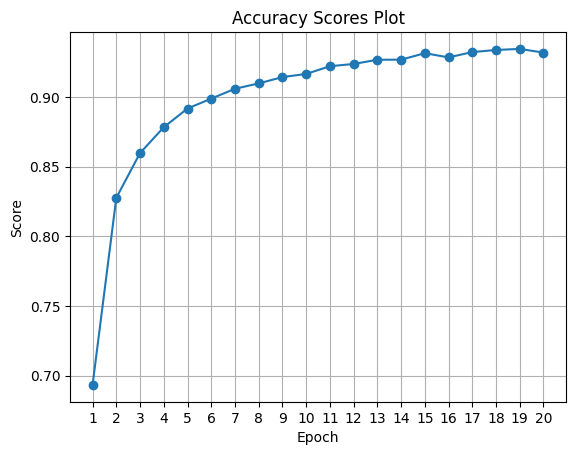

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(scores) + 1), scores, marker='o')
plt.xticks(range(1, len(scores) + 1))
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Accuracy Scores Plot')
plt.grid(True)
plt.show()

In [23]:
w_i_h1.shape

(255, 784)

In [28]:
import pandas as pd
"""
       w_h3_o += -learn_rate * partial_o.dot(np.transpose(h3))
        b_h3_o += -learn_rate * partial_o
        
        w_h2_h3 += -learn_rate * delta_h3.dot(np.transpose(h2))
        b_h2_h3 += -learn_rate * delta_h3
        
        w_h1_h2 += -learn_rate * delta_h2.dot(np.transpose(h1))
        b_h1_h2 += -learn_rate * delta_h2

        w_i_h1 += -learn_rate * delta_h1.dot(np.transpose(img))
        b_i_h1 += -learn_rate * delta_h1
"""



SyntaxError: EOF while scanning triple-quoted string literal (3996096280.py, line 14)

In [27]:
w_h3_o.values

array([[-0.86227884, -1.88838465,  0.19107727, ..., -0.25323561,
        -1.09244897, -0.07102458],
       [-0.69927946, -0.24157698, -0.00972116, ...,  0.38219319,
        -0.36426426, -1.35981071],
       [-0.53450241, -2.2056972 ,  0.418262  , ..., -0.15753728,
        -1.86727334, -0.70984824],
       ...,
       [-0.22477959, -0.18714142,  0.07166237, ..., -0.62418078,
        -0.09472942, -0.0582284 ],
       [-0.24713508, -0.14328155,  0.07573147, ..., -0.49597582,
        -0.05096807,  0.05457977],
       [-0.73265342, -0.11416793, -0.41081646, ...,  0.26893913,
        -1.08233766, -0.18622603]])

In [20]:
b_i_h1 = pd.read_csv('model/bih1.csv').values
w_i_h1 = pd.read_csv('model/wih1.csv').values

b_h1_h2 = pd.read_csv('model/bh1h2.csv').values
w_h1_h2 = pd.read_csv('model/wh1h2.csv').values

b_h2_h3 = pd.read_csv('model/bh2h3.csv').values
w_h2_h3 = pd.read_csv('model/wh2h3.csv').values

b_h3_o = pd.read_csv('model/bh3o.csv').values
w_h3_o = pd.read_csv('model/wh3o.csv').values

In [19]:
letter_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}

ValueError: matrices are not aligned

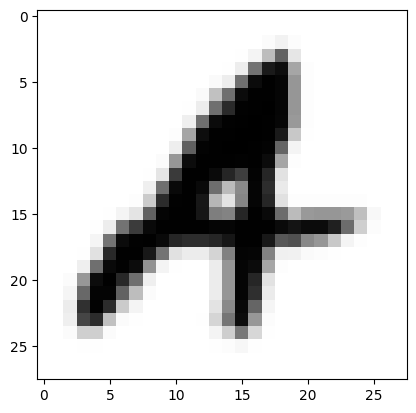

In [26]:
# Show results
while True:
    index = int(input("Enter a number (0 - 14798): "))
    img = test_images[index]
    plt.imshow(np.fliplr(rotate(img.reshape(28, 28),-90)), cmap="Greys")
    
    img = img.reshape(-1,1)
    # Forward propagation
    h1_pre = b_i_h1 + w_i_h1.dot(img)
    h1 = np.log(1 + np.exp(h1_pre))  # Softplus activation
    
    h2_pre = b_h1_h2 + w_h1_h2.dot(h1)
    h2 = np.log(1 + np.exp(h2_pre))  # Softplus activation
    
    h3_pre = b_h2_h3 + w_h2_h3.dot(h2)
    h3 = np.log(1 + np.exp(h3_pre))  # Softplus activation
    
    o_pre = b_h3_o + w_h3_o.dot(h3)
    o = 1 / (1 + np.exp(-o_pre))

    plt.title(f"Looks like {letter_dict[o.argmax()]} :)")
    plt.show()
